# Diagnosing Cancer with Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings("ignore")
import matplotlib as mpl


# Get the Data

In [2]:
cancer = pd.read_csv('data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Get information about the columns.
## The column 'diagnosis' is the target variable. M - malignant is a diagnosis of cancer and B - benign is a diagnosis of not cancer.

In [3]:
print(cancer.info(), cancer.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## There are two columns that are no use if we want to predict the diagnosis. Drop them and also replace M with 1 and B with 0 (int)

### first we see in the description that tere is a column named 'unnamed: 32' so we will take a look on that see if there is anything spacial there and continue to research

In [4]:
print(cancer['Unnamed: 32'].info(), cancer['Unnamed: 32'].describe())
cancer = cancer.drop(['Unnamed: 32'], axis=1)
cancer.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Unnamed: 32
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 4.6 KB
None count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 32, dtype: float64


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### we also dont need the id to predict the chances to get cancer so we can drop that too

In [5]:
cancer = cancer.drop(['id'], axis=1)
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## replace the M to 1 and B to 0

In [6]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})
cancer['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## lets see what has changed

In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Get statistical descriptions of all of the columns.

In [8]:
cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### EDA

#### Make a barplot showing the distribution of the target variable.

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

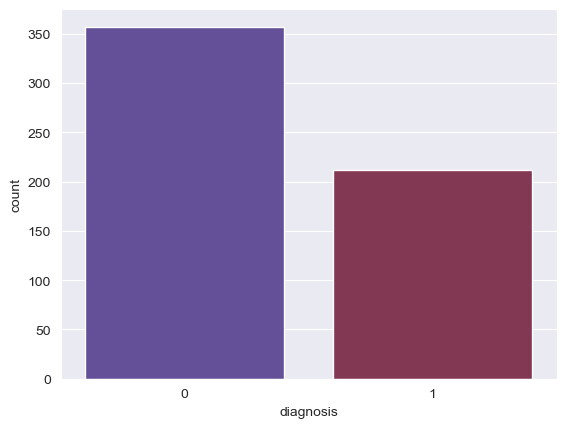

In [9]:
sns.countplot(x=cancer['diagnosis'],data=cancer,palette='twilight')

#### Make histograms for each of the columns showing the distribution of each column for diagnosis=0 and diagnosis=1

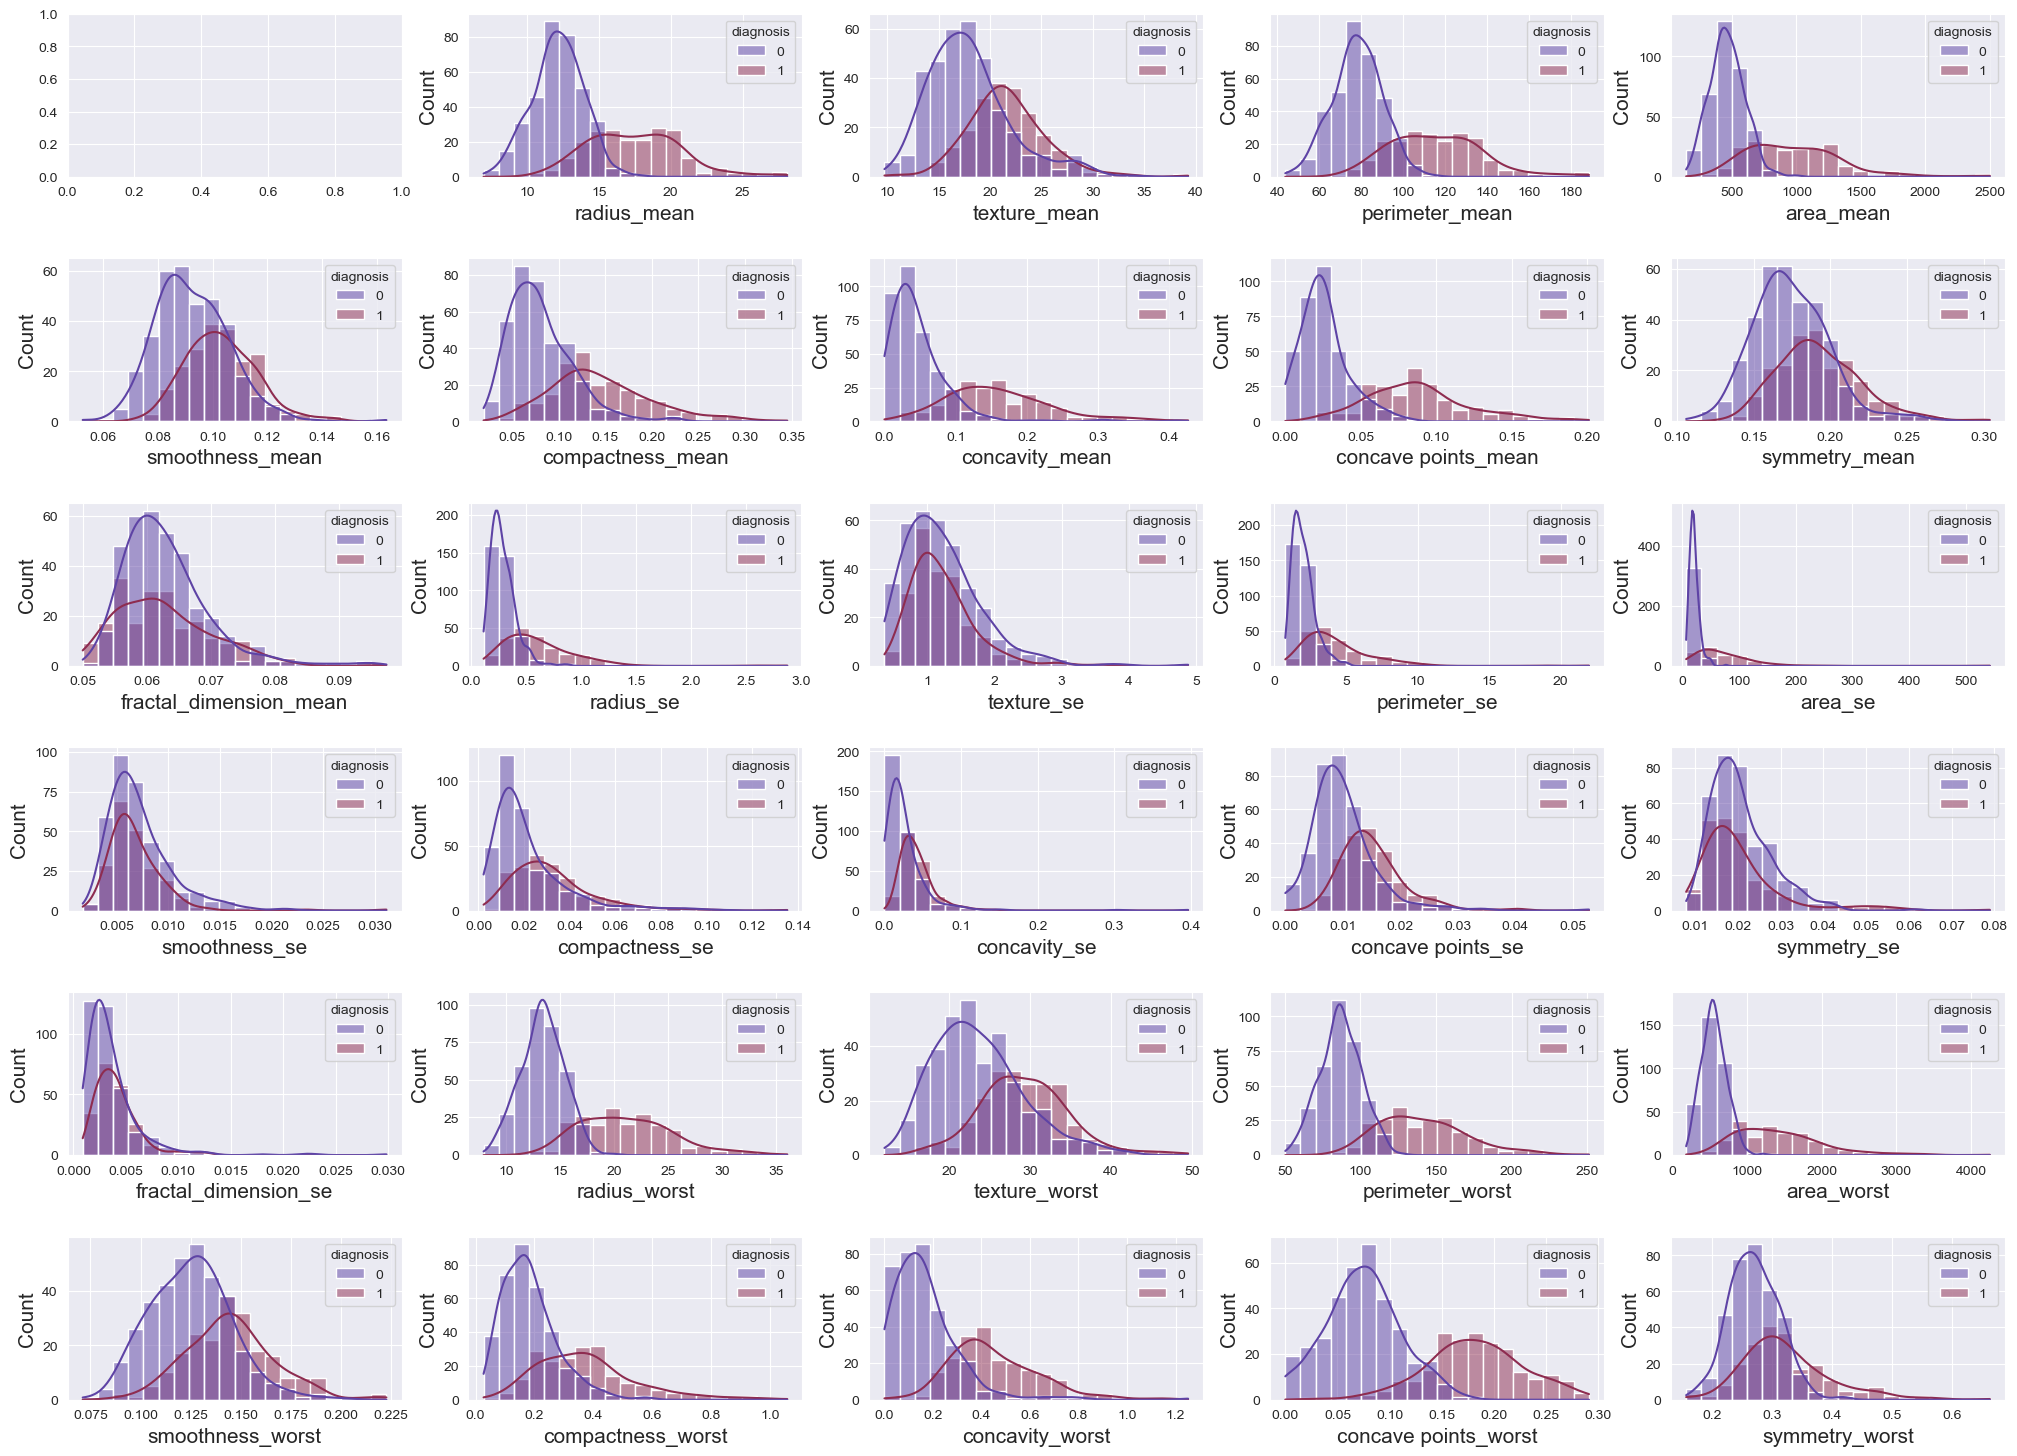

In [10]:
fig, axes = plt.subplots(nrows = 6,ncols= 5,figsize = (25,18),sharex = False)
fig.subplots_adjust(hspace = 0.5)
for col,ax in zip(cancer, axes.flat):
    if col != 'diagnosis':
        sns.histplot(x=col,data=cancer,ax=ax, hue = 'diagnosis',bins= 20 ,kde= True,palette="twilight")
        ax.set_xlabel(col,fontsize=15)
        ax.set_ylabel('Count',fontsize=15)

#### How can the histograms help you understand which columns a decision tree might  split on at the root?

#### Make a heatmap showing the correlations between the variables.

[Text(0, 0.5, 'diagnosis'),
 Text(0, 1.5, 'radius_mean'),
 Text(0, 2.5, 'texture_mean'),
 Text(0, 3.5, 'perimeter_mean'),
 Text(0, 4.5, 'area_mean'),
 Text(0, 5.5, 'smoothness_mean'),
 Text(0, 6.5, 'compactness_mean'),
 Text(0, 7.5, 'concavity_mean'),
 Text(0, 8.5, 'concave points_mean'),
 Text(0, 9.5, 'symmetry_mean'),
 Text(0, 10.5, 'fractal_dimension_mean'),
 Text(0, 11.5, 'radius_se'),
 Text(0, 12.5, 'texture_se'),
 Text(0, 13.5, 'perimeter_se'),
 Text(0, 14.5, 'area_se'),
 Text(0, 15.5, 'smoothness_se'),
 Text(0, 16.5, 'compactness_se'),
 Text(0, 17.5, 'concavity_se'),
 Text(0, 18.5, 'concave points_se'),
 Text(0, 19.5, 'symmetry_se'),
 Text(0, 20.5, 'fractal_dimension_se'),
 Text(0, 21.5, 'radius_worst'),
 Text(0, 22.5, 'texture_worst'),
 Text(0, 23.5, 'perimeter_worst'),
 Text(0, 24.5, 'area_worst'),
 Text(0, 25.5, 'smoothness_worst'),
 Text(0, 26.5, 'compactness_worst'),
 Text(0, 27.5, 'concavity_worst'),
 Text(0, 28.5, 'concave points_worst'),
 Text(0, 29.5, 'symmetry_worst'),

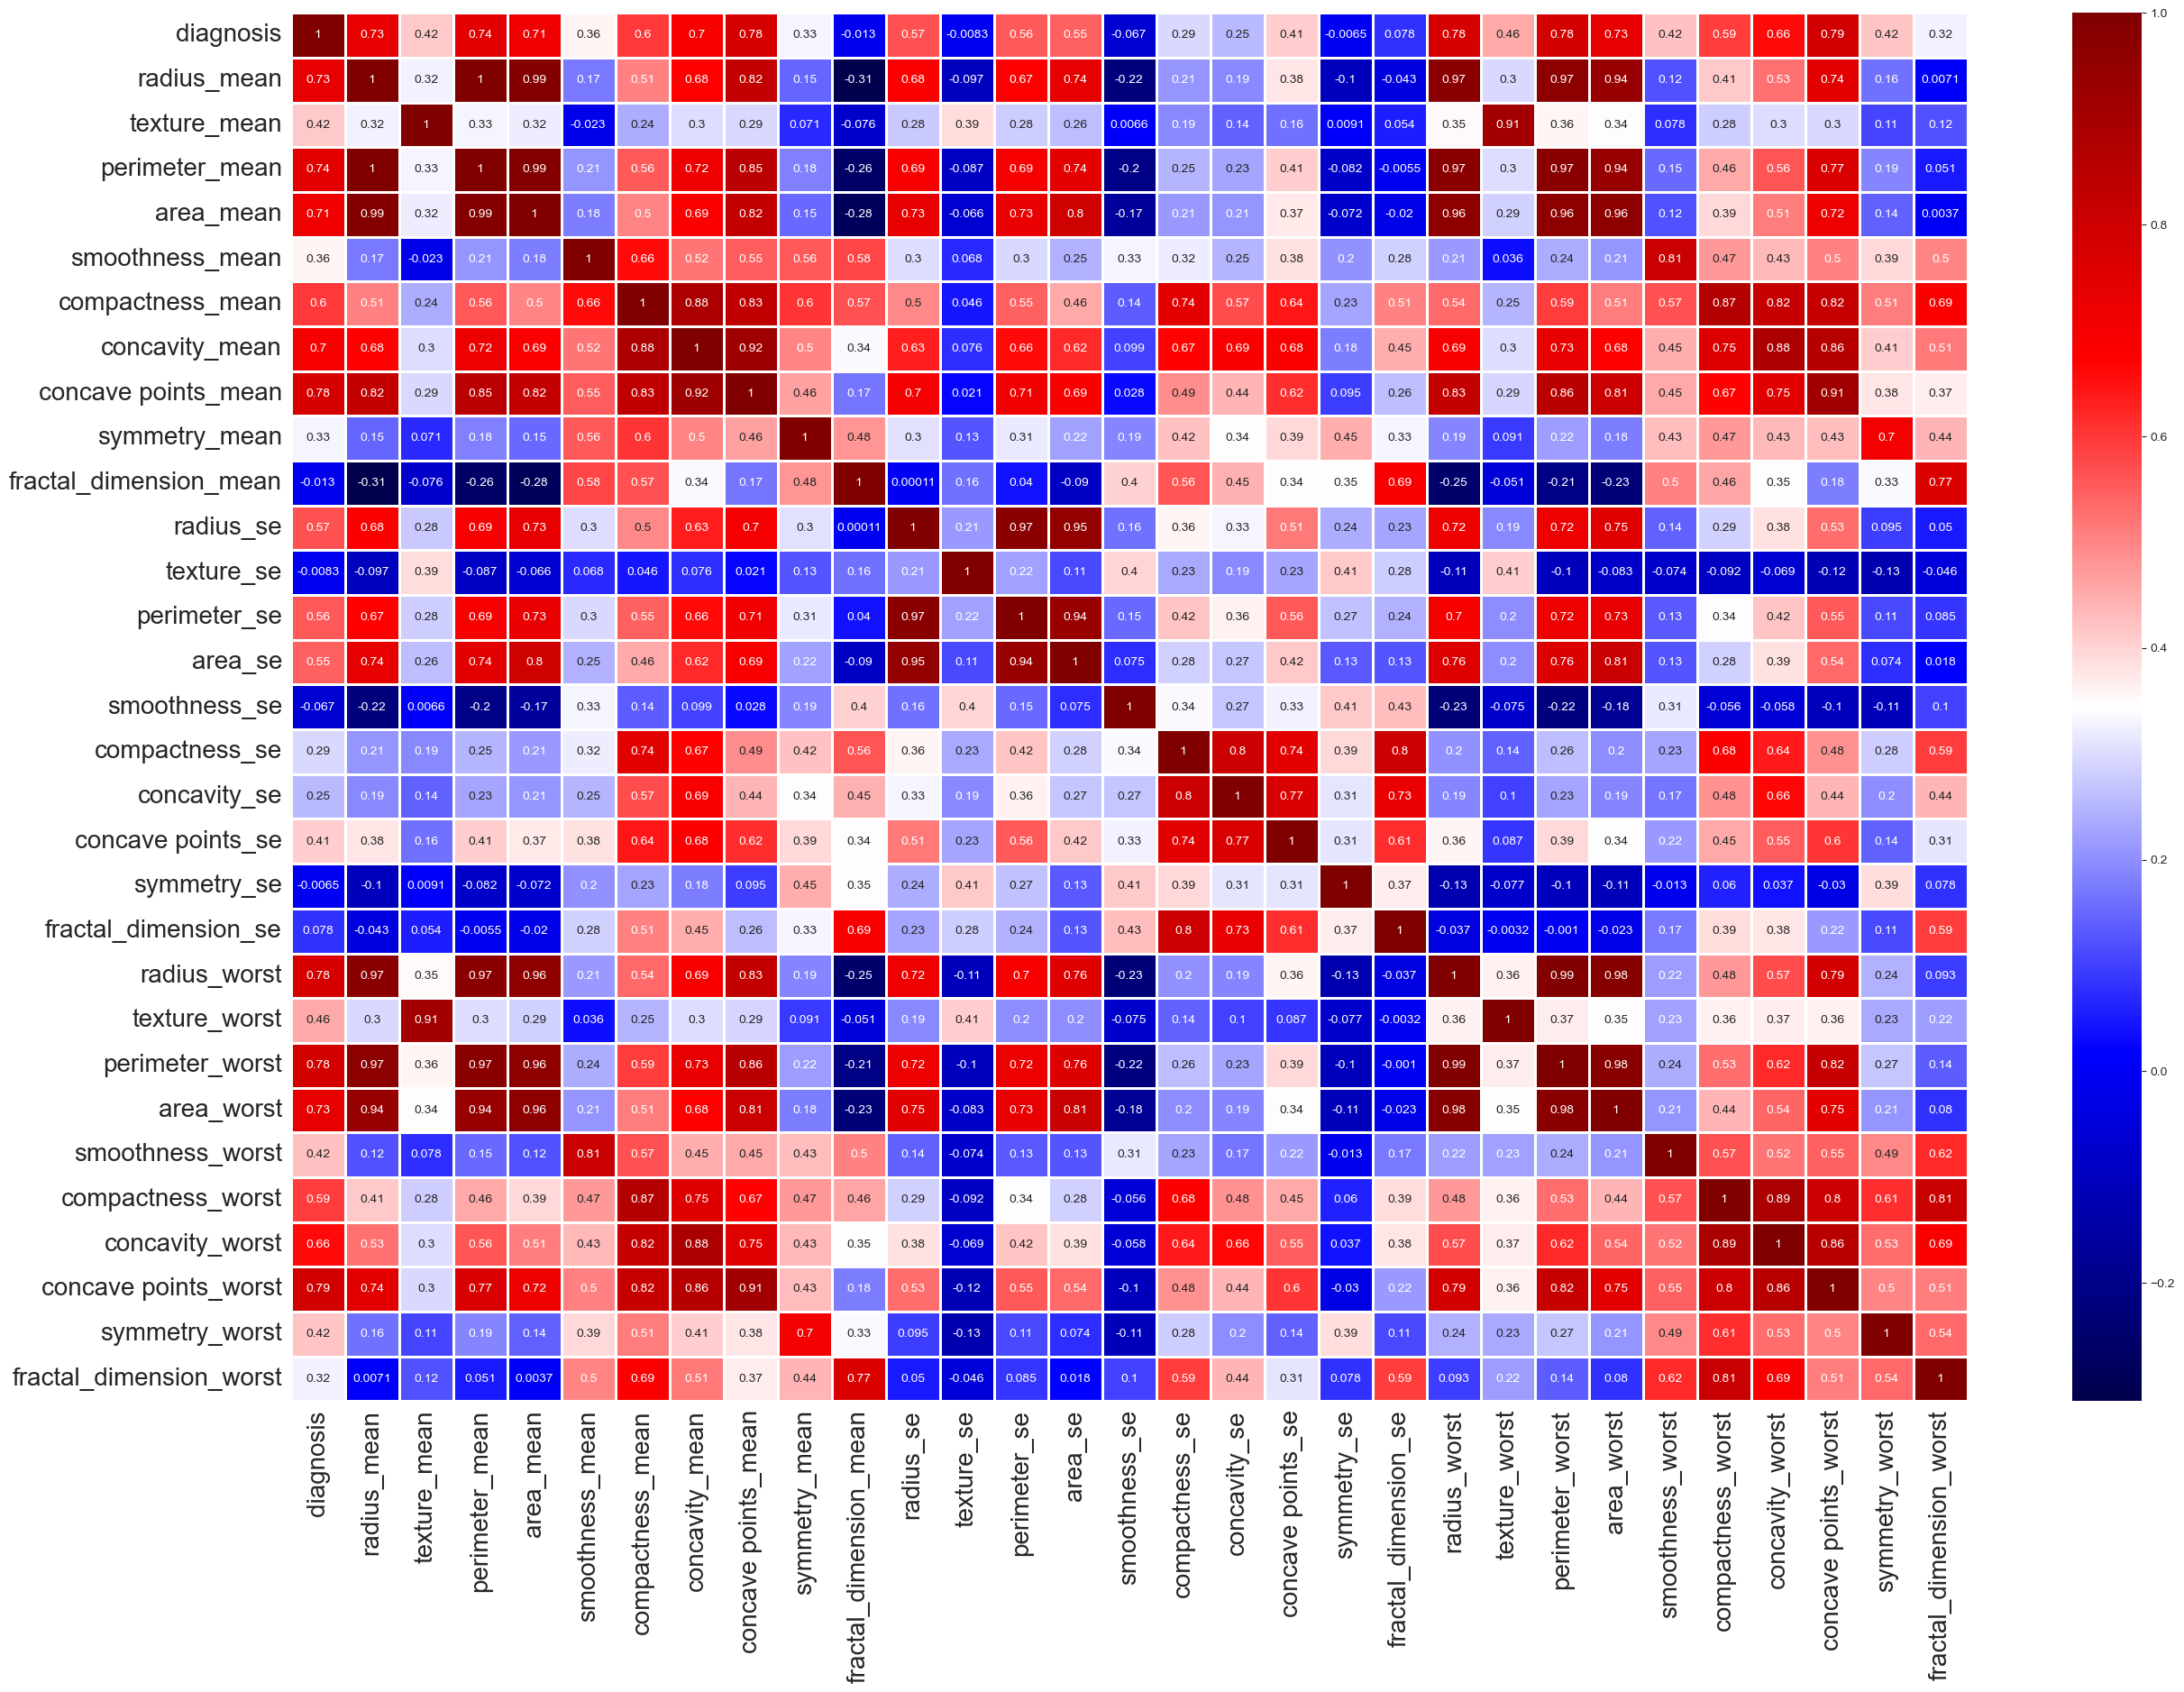

In [11]:
cancerCor = cancer.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(data=cancerCor, annot=True,linewidth=1,cmap="seismic")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 20)


#### Make a scatter plot with radius_mean on the x axis and concavity_mean on the y axis, coloured by diagnosis.

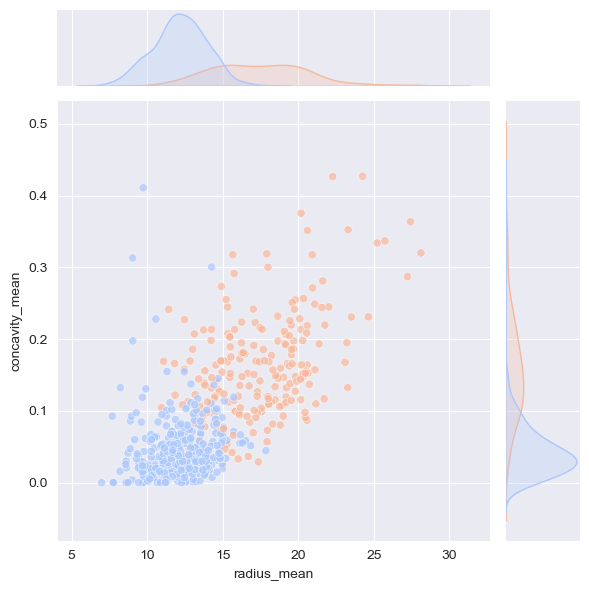

In [12]:
sns.jointplot(data=cancer, x=cancer["radius_mean"], y=cancer["concavity_mean"],
            hue='diagnosis',legend=False,kind="scatter", alpha=0.7,palette="coolwarm")

#### Look at the points and make a general rule how the x coordinate and y coordinate are related to the diagnosis.

##### we can see that if the x coordinate and the y coordinate are on top of each other there is more change that the diagnosis is True

#### Roughly, in which range doesn't the rule work?

##### we can see that the x coordinate and y coordinate are related when 11>x & x>16 and 0.05>y y>1.2

#### Explain how you can see the same rule in the two histograms.   How does this also explain the sign of the correlation coefficient.

##### we can see in the heatmap that they have high correlation coefficient of 0.24 ints not 0 so the corralation is not perfect but there is a lot of similarity between them

#### Make a scatterplot with fractal_dimension_mean on the x axis and texture_se on the y axis, coloured by diagnosis. 

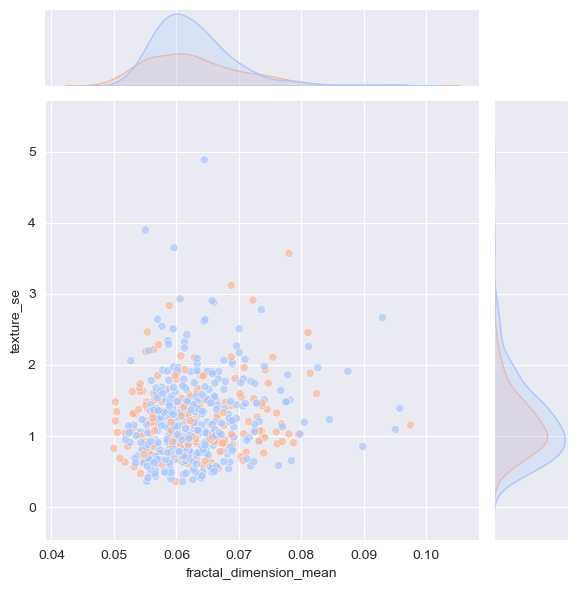

In [13]:
sns.jointplot(data=cancer, x=cancer["fractal_dimension_mean"], y=cancer["texture_se"],
            hue='diagnosis',legend=False,kind="scatter", alpha=0.7,palette="coolwarm")

#### Explain the connection with the histograms and with the correlation coefficient.

##### in this histogram, the correlation coefficient is very high we can see that The graphs really contain each other

#### Now make a scatterplot with symmetry_se on the x axis and perimeter_worst on the y axis, coloured by diagnosis.

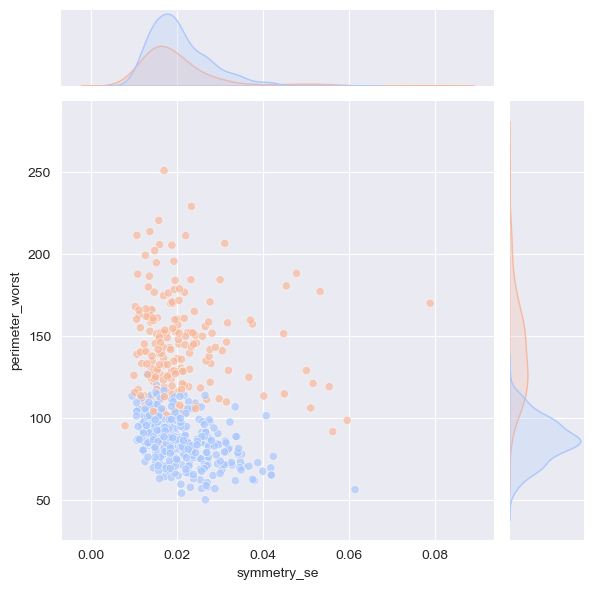

In [14]:
sns.jointplot(data=cancer, x=cancer["symmetry_se"], y=cancer["perimeter_worst"],
            hue='diagnosis',legend=False,kind="scatter", alpha=0.7,palette="coolwarm")

#### Is there a rule for deciding the diagnosis? Explain how this is related to the histograms and explain the correlation coefficient.

#####Answer:we can see that where we have higher correlation the chance of diagnosis to be True is higher

#### Make a scatter plot for 'perimeter_mean'  and 'area_mean'

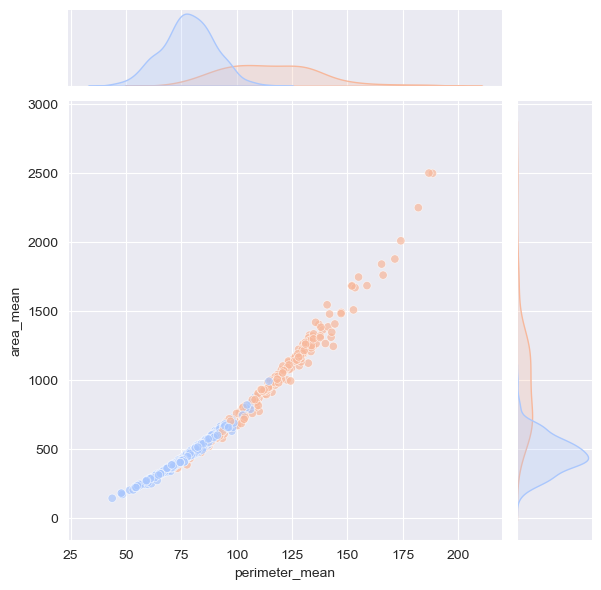

In [15]:
sns.jointplot(data=cancer, x=cancer["perimeter_mean"], y=cancer["area_mean"],
            hue='diagnosis',legend=False,kind="scatter", alpha=0.7,palette="coolwarm")

#### The points look more like a  part of a parabola than a straight line. Why might this be true? (Think about the meaning of the variables.) 

Answer: 

- Note 1: A large correlation coefficient doesn't necessarily mean that the relationship is linear. It means that if the relationship is linear there is a good fit.
- Note 2: Since we are doing  tree classification and not linear regression it's not important to drop highly correlated variables. We will leave them all in the model.

##  Splitting the data

#### Split inֿ
to train set (70%) and test set (30%). Use random state = 101.

In [16]:
features= cancer.drop("diagnosis", axis=1)

X = features
y = cancer['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)

## Decision Tree - Gini

In [18]:
from sklearn import tree
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve

#### Fit a decision tree to the train data . Use criterion = 'gini' and random_state =101

In [20]:
gini = tree.DecisionTreeClassifier(criterion='gini', random_state = 101)
gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

#### Plot the decision tree.

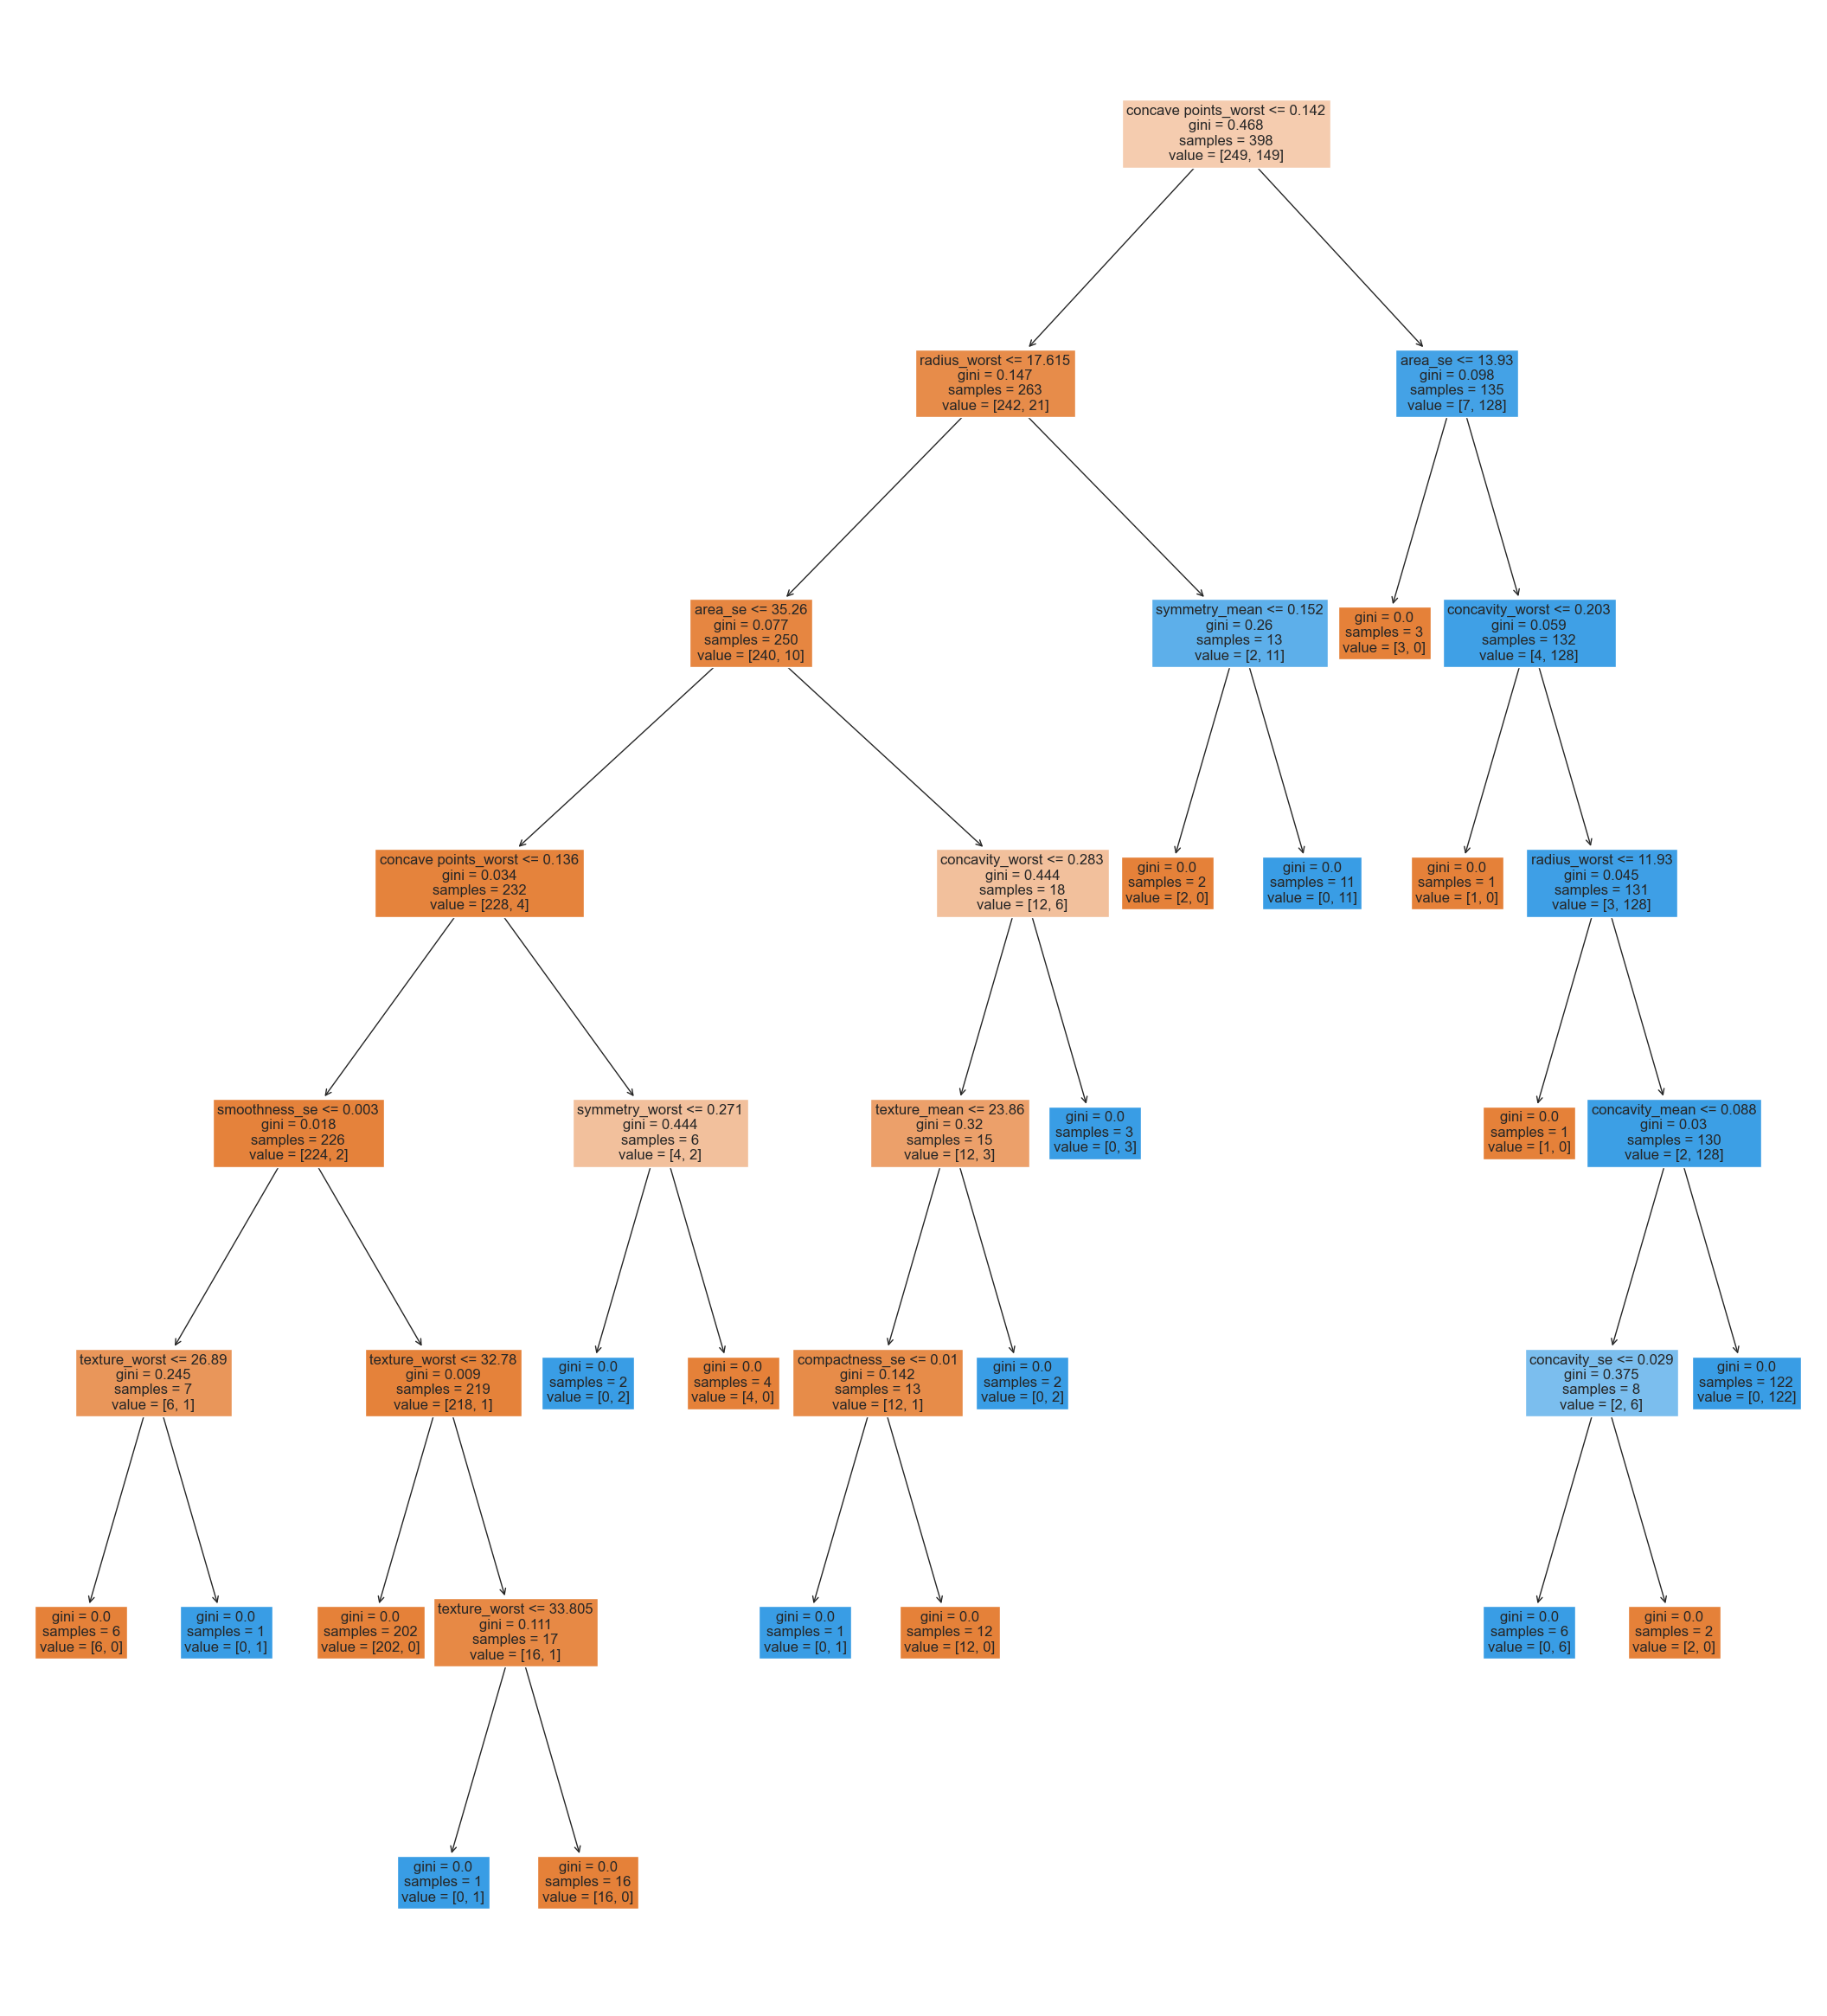

In [37]:
fig,axes = plt.subplots(1,1,figsize=(27,30))
tree.plot_tree(gini,feature_names=list(X_train.columns),filled=True,fontsize=12)
fig.savefig('decision_tree_gini.png', dpi=300,bbox_inches='tight')

### Accuracy metrics  - DT Gini

#### Make predictions for test set and calculate accuracy, roc_auc , the confusuion matrix and the classification report.

In [48]:
y_pred = gini.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC",roc_auc)

Accuracy: 0.9122807017543859
ROC AUC 0.9206349206349206


<AxesSubplot: >

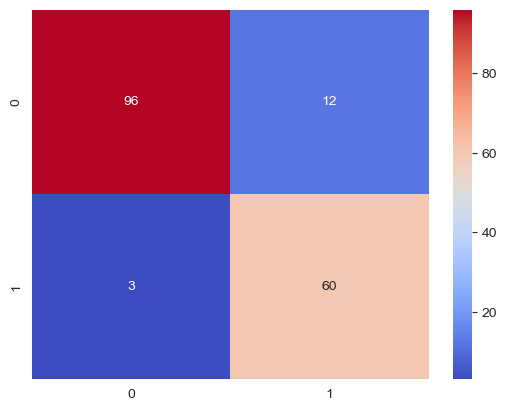

In [49]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [50]:
class_report = classification_report(y_test,y_pred)
print("Classification report\n",class_report)

Classification report
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       108
           1       0.83      0.95      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



#### Does changing max_depth or min_samples_leaf improve the results?

##### leats test that

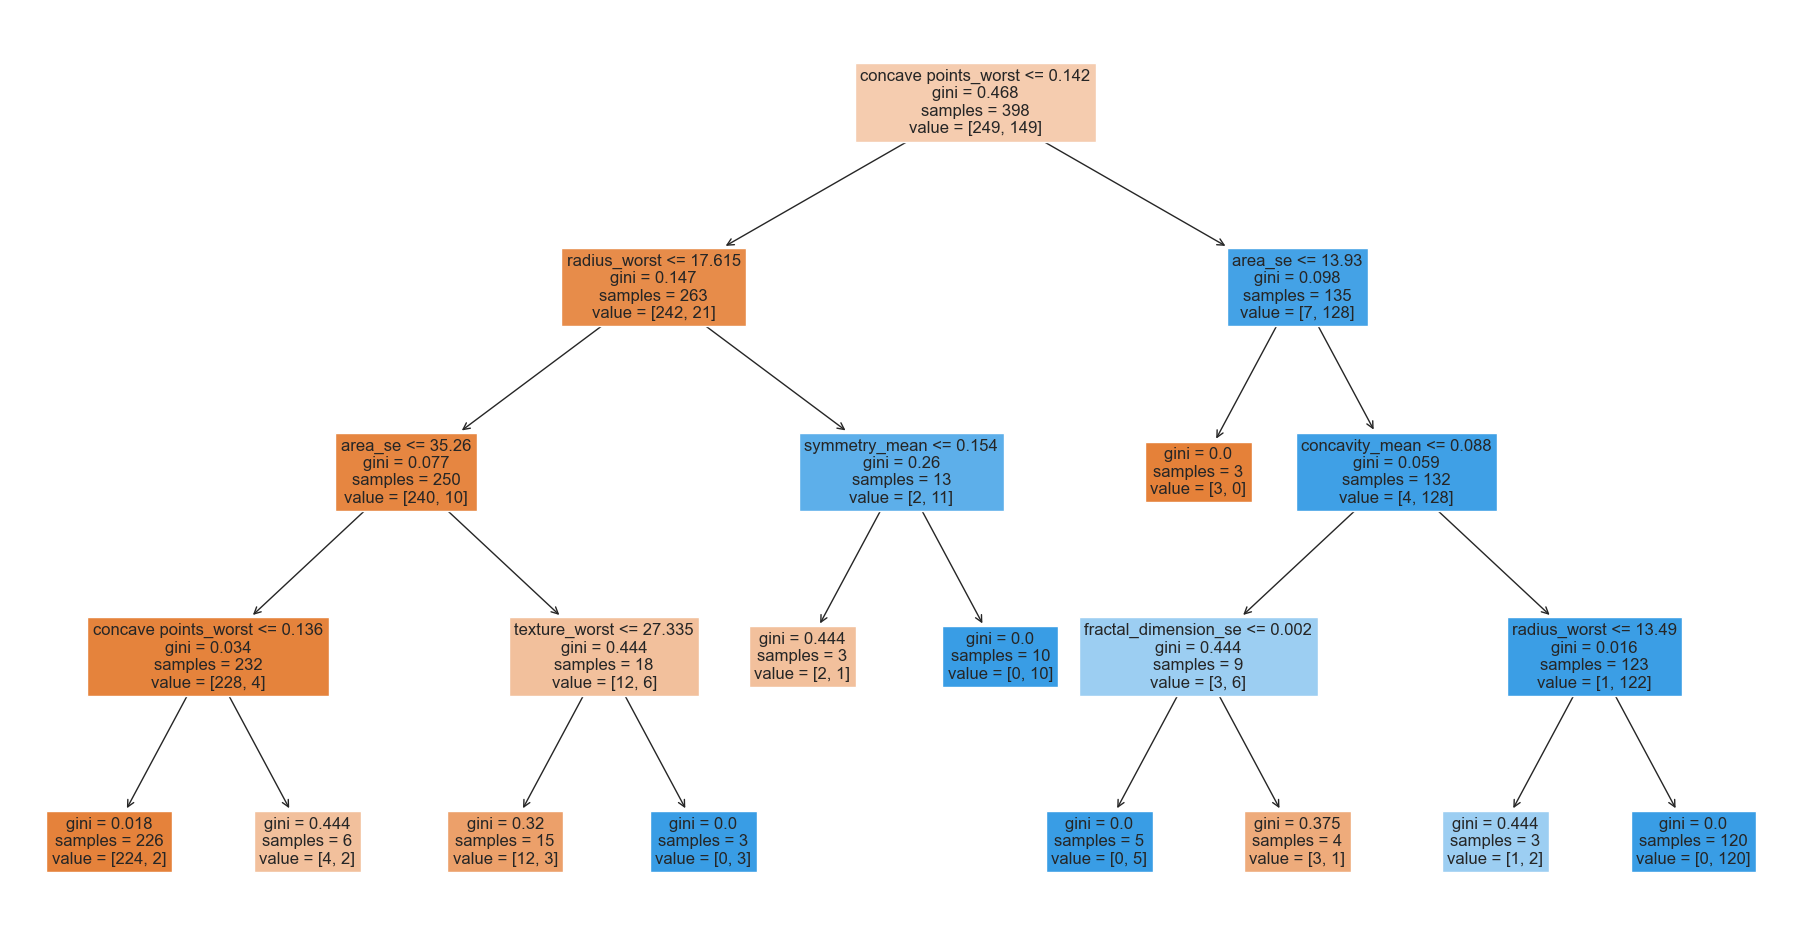

In [51]:
gini = tree.DecisionTreeClassifier(criterion='gini', random_state = 101,max_depth=4,min_samples_leaf=3)
gini.fit(X_train, y_train)
y_pred = gini.predict(X_test)

fig,axes = plt.subplots(1,1,figsize=(23,12))
tree.plot_tree(gini,feature_names=list(X_train.columns),filled=True,fontsize=12)
fig.savefig('decision_tree_gini.png', dpi=300,bbox_inches='tight')

In [52]:
y_pred = gini.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC",roc_auc)

Accuracy: 0.9239766081871345
ROC AUC 0.9232804232804233


<AxesSubplot: >

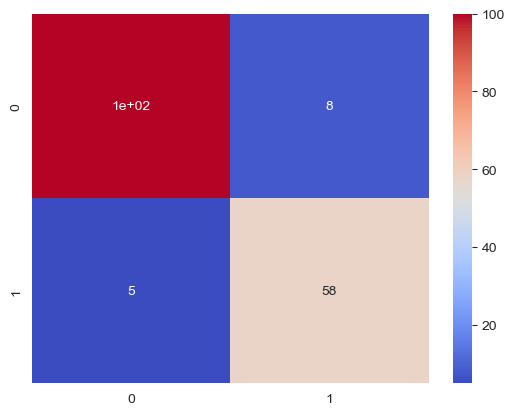

In [53]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [54]:
class_report = classification_report(y_test,y_pred)
print("Classification report\n",class_report)

Classification report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



##### yes we can see a that all the parameters are much better than before

## Decision Tree - Entropy

#### Change the criterion to 'entropy' and fit a new model. Use the same random_state.

In [55]:
entropy = tree.DecisionTreeClassifier(criterion='entropy',random_state=101)
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

#### Make a plot showing the tree.

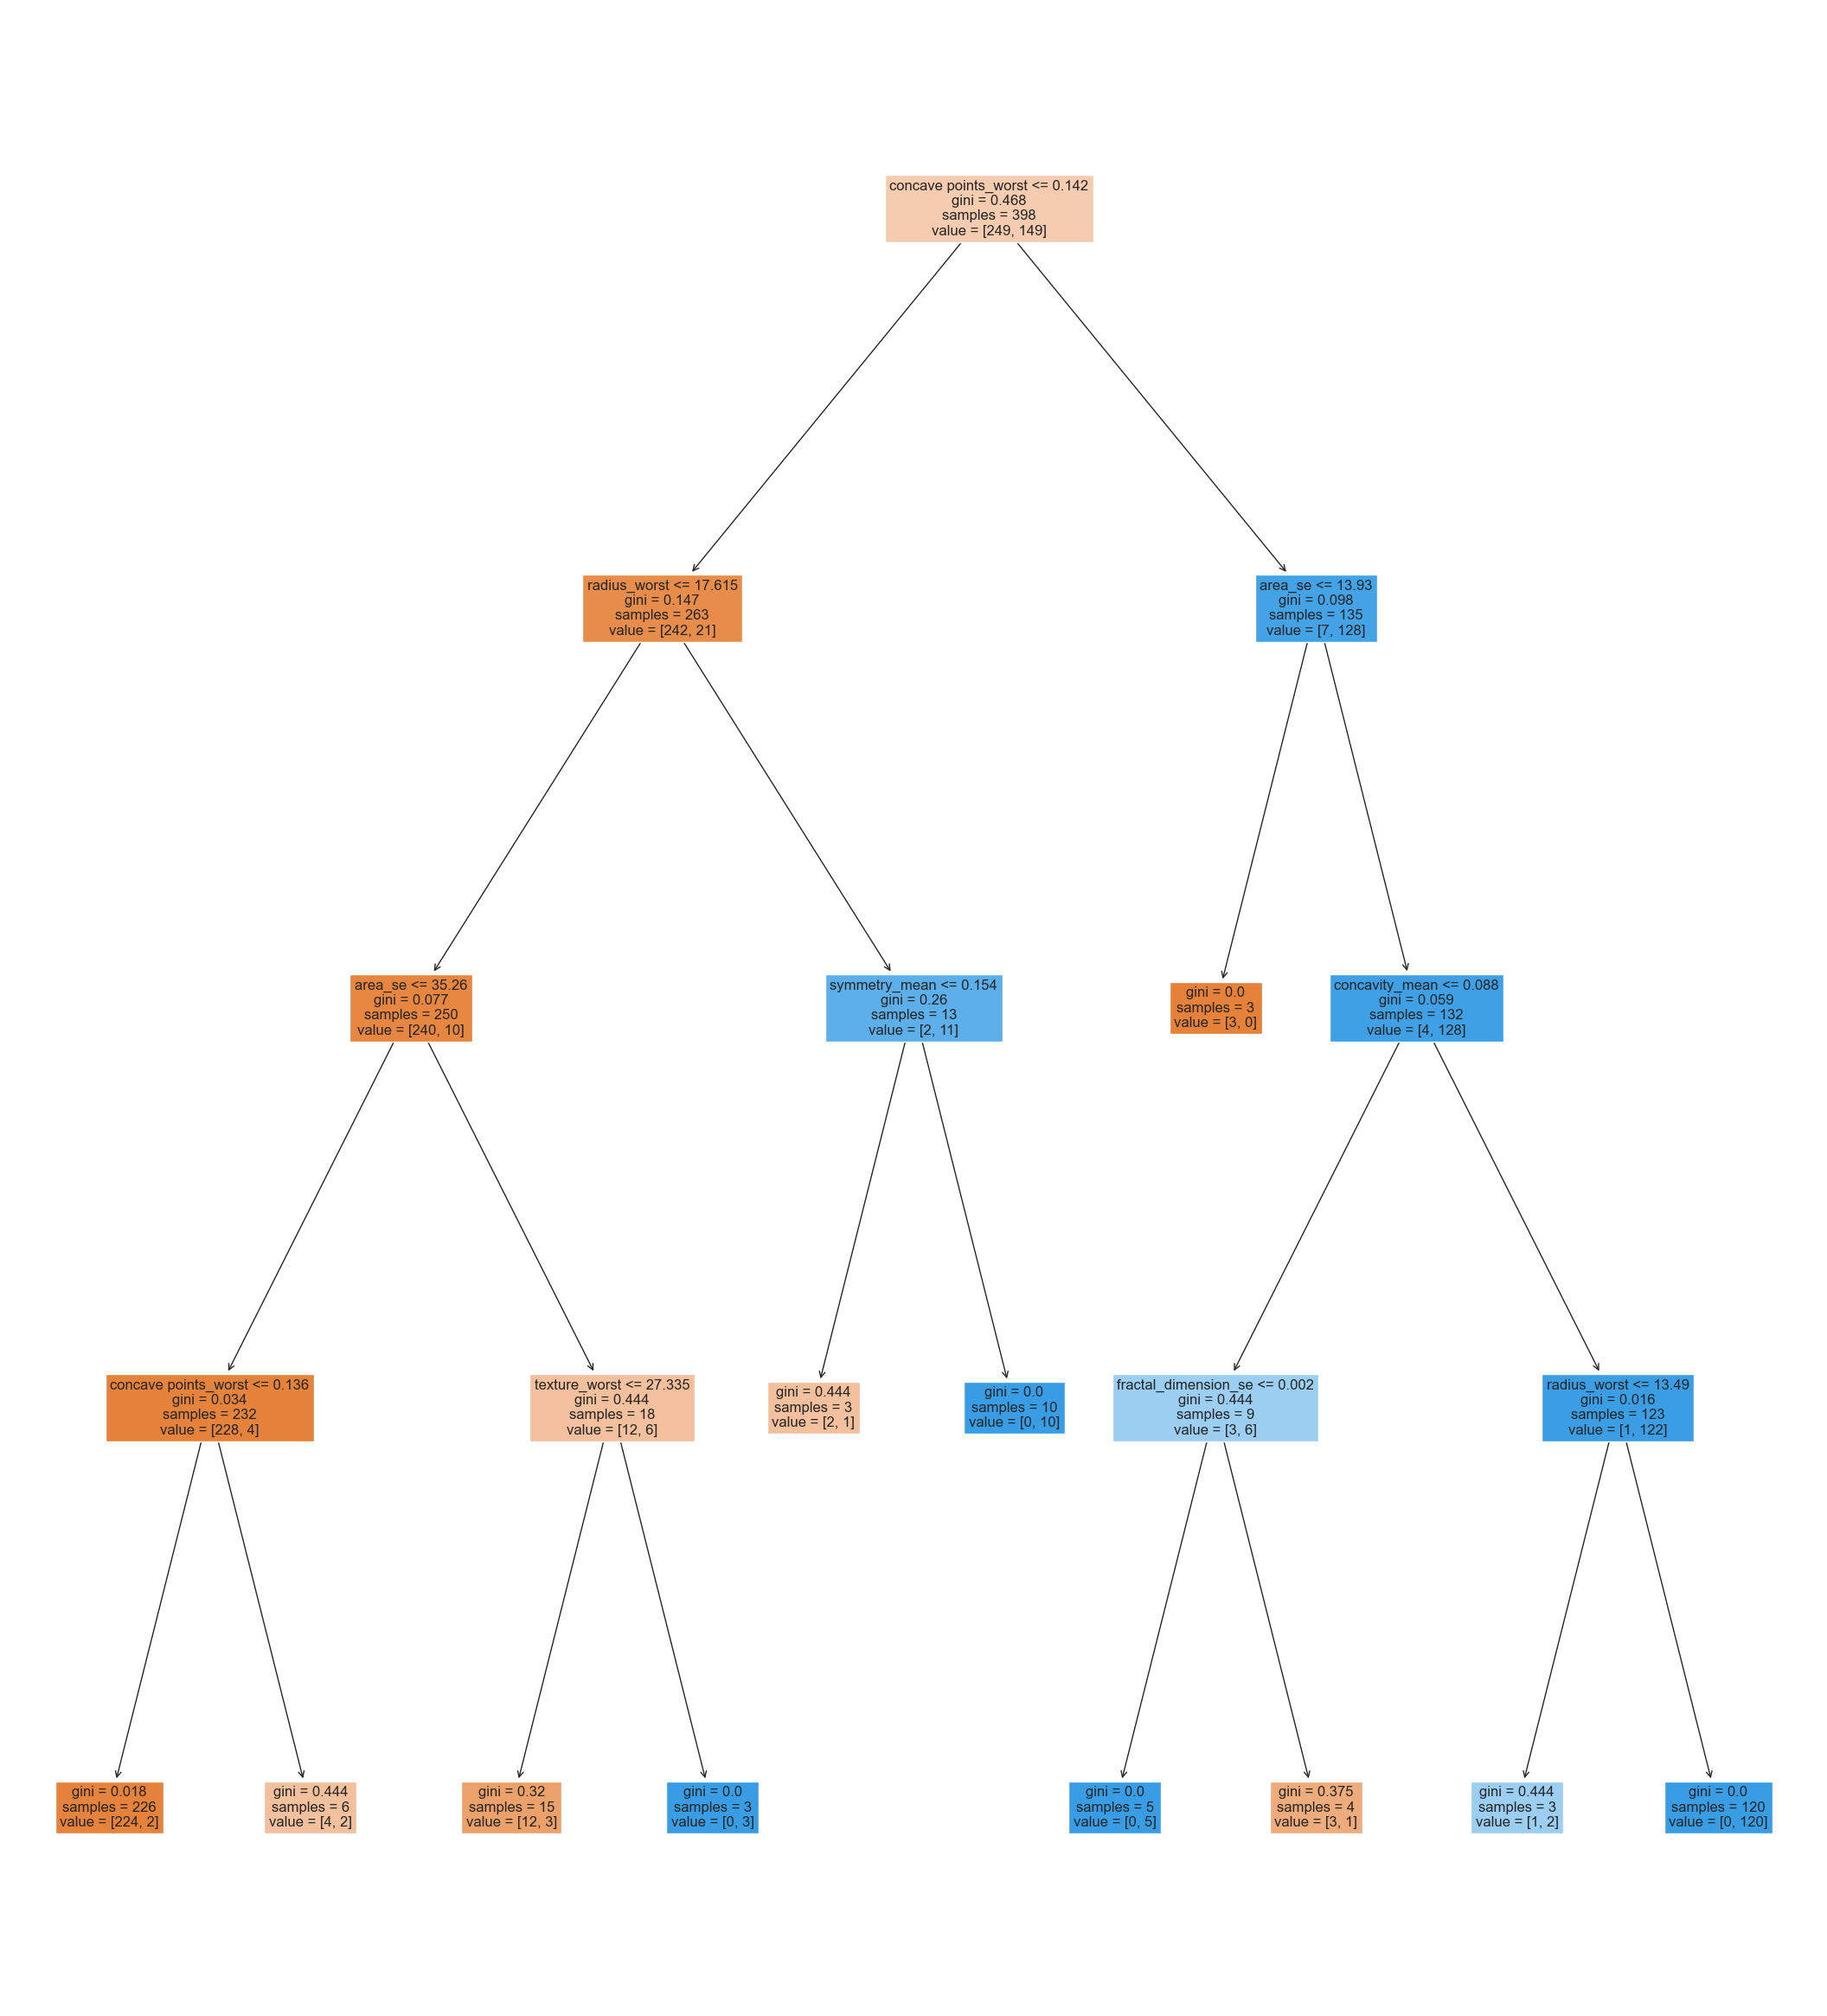

In [56]:
fig,axes = plt.subplots(1,1,figsize=(27,30))
tree.plot_tree(gini,feature_names=list(X_train.columns),filled=True,fontsize=12)
fig.savefig('decision_tree_gini.png', dpi=300,bbox_inches='tight')

### Accuracy metrics  - DT Entropy

#### Make predictions for test set and calculate accuracy, roc_auc , the confusuion matrix and the classification report.

In [57]:
y_pred = gini.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC :",roc_auc)


Accuracy:  0.9239766081871345
ROC AUC : 0.9232804232804233


<AxesSubplot: >

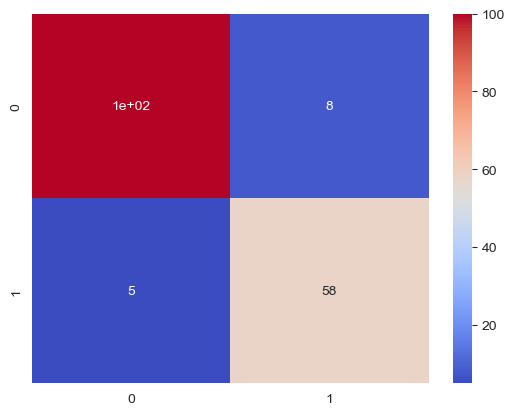

In [58]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [59]:
class_report = classification_report(y_test,y_pred)
print("Classification report is:\n",class_report)

Classification report is:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



#### Try changing the values of max_depth and min_samples_leaf

In [61]:
gini = tree.DecisionTreeClassifier(criterion='entropy', random_state = 101,max_depth=4,min_samples_leaf=3)
gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=101)

### ROC curves

#### Make ROC curves for both models. Use the best model you made with gini and the best model with entropy.

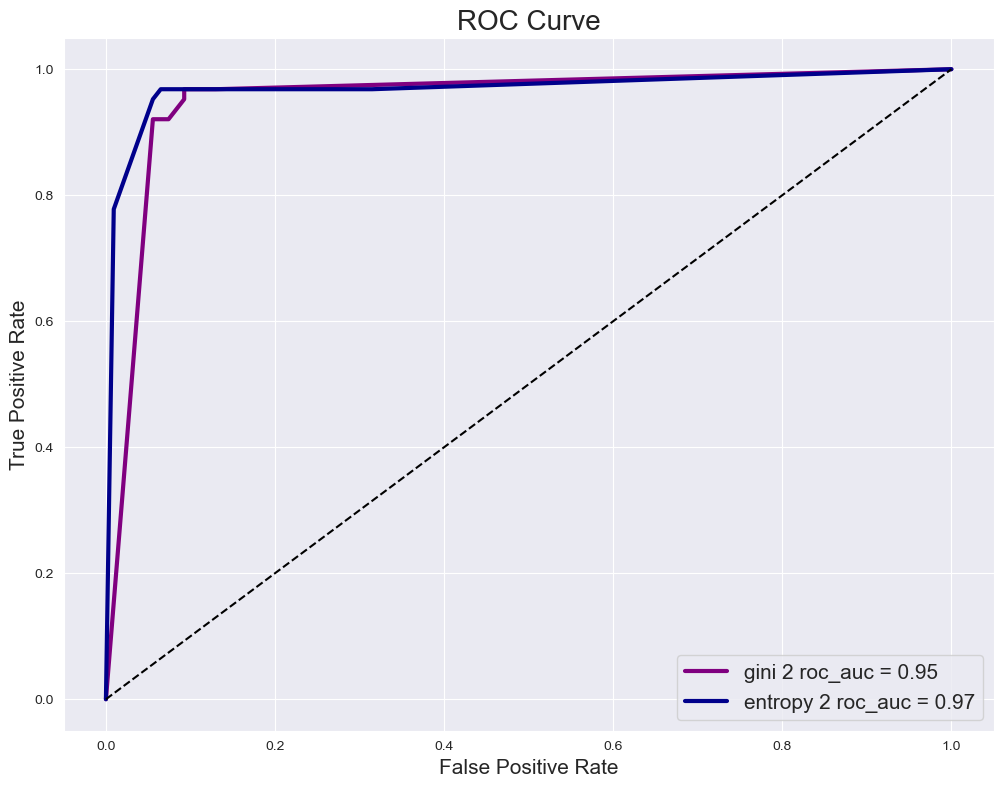

In [63]:
#predict probabilities for gini model, and calculate variables to make roc graph.
gini = tree.DecisionTreeClassifier(criterion='gini',random_state=101,max_depth=4,min_samples_leaf=3)
gini.fit(X_train, y_train)
probs_gini = gini.predict_proba(X_test)[:,1:]
fpr1, tpr1, thresholds1 = roc_curve(y_test,probs_gini)

#calculate the auc for the model (roc_auc_score())
auc_gini = roc_auc_score(y_test,probs_gini)

#the same for the entropy model
entropy = tree.DecisionTreeClassifier(criterion='entropy',random_state=101,max_depth=4,min_samples_leaf=3)
entropy.fit(X_train, y_train)
probs_entropy = entropy.predict_proba(X_test)[:,1:]
fpr2, tpr2, thresholds2 = roc_curve(y_test,probs_entropy)

#calculate the auc for the model (roc_auc_score())
auc_entropy = roc_auc_score(y_test,probs_entropy)

plt.figure(figsize=(12,9))
plt.plot(fpr1,tpr1,linewidth=3,label='gini 2 roc_auc = %.2f' % auc_gini,color = 'purple')
plt.plot(fpr2,tpr2,linewidth=3,label='entropy 2 roc_auc = %.2f' %auc_entropy,color = 'darkblue')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC Curve',fontsize=20)
plt.legend(loc='lower right',fontsize=15)

#### Which model is better? Specify in your answer the values of all the arguments of the model fit.

##### we can see the curveof the entropy tree is having higher True Positive Rate then the gini